In [1]:
#1 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

import FinanceDataReader as fdr

# debug
import pdb
#pdb.set_trace()

import seaborn as sns

# 시각화 사용자 설정
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#2 DF 만들기 (종가, 공통지수들)
#공통지수
def makeCommonData(startDate) :
    
    # 공통지수
    # 한국
    # KOSPI 지수
    KS11 = fdr.DataReader('KS11', start=startDate)
    # KOSDAQ 지수
    KQ11 = fdr.DataReader('KQ11', start=startDate)
    # KOSPI 50 지수
    KS50 = fdr.DataReader('KS50', start=startDate)
    # KOSPI 100
    KS100 = fdr.DataReader('KS100', start=startDate)
    # KRX 100
    KRX100 = fdr.DataReader('KRX100', start=startDate)
    # 코스피 200
    KS200 = fdr.DataReader('KS200', start=startDate)
    
    # 미국
    # 다우존스 지수
    DJI = fdr.DataReader('DJI', start=startDate)
    # 나스닥 지수
    IXIC = fdr.DataReader('IXIC', start=startDate)
    # S&P 500 지수
    US500 = fdr.DataReader('US500', start=startDate)
    # S&P 500 VIX
    VIX = fdr.DataReader('VIX', start=startDate)
    
    # 국가별 주요 지수
    # 닛케이 225 선물
    JP225 = fdr.DataReader('JP225', start=startDate)
    # Euro Stoxx 50
    STOXX50 = fdr.DataReader('STOXX50', start=startDate)
    # CSI 300 (중국)
    CSI300 = fdr.DataReader('CSI300', start=startDate)
    # 항셍 (홍콩)
    HSI = fdr.DataReader('HSI', start=startDate)
    # 영국 FTSE
    FTSE = fdr.DataReader('FTSE', start=startDate)
    # 독일 DAX 30
    DAX = fdr.DataReader('DAX', start=startDate)
    # 프랑스 CAC 40
    CAC = fdr.DataReader('CAC', start=startDate)
    
    # 환율
    # 달러당 원화 환율
    USD_KRW = fdr.DataReader('USD/KRW', start=startDate)
    # 달러당 유로화 환율
    USD_EUR = fdr.DataReader('USD/EUR', start=startDate)
    # 달러당 엔화 환율
    USD_JPY = fdr.DataReader('USD/JPY', start=startDate)
    # 위엔화 원화 환율
    CNY_KRW = fdr.DataReader('CNY/KRW', start=startDate)
    # 유로화 달러 환율
    EUR_USD = fdr.DataReader('EUR/USD', start=startDate)
    # 엔화 원화 환율
    JPY_KRW = fdr.DataReader('JPY/KRW', start=startDate)
    # 오스트레일리아 달러 환율
    AUD_USD = fdr.DataReader('AUD/USD', start=startDate)
    # 유로화 엔화 환율
    EUR_JPY = fdr.DataReader('EUR/JPY', start=startDate)
    # 달러 루블화
    USD_RUB = fdr.DataReader('USD/RUB', start=startDate)
    
    # 코인 가격 - 2018년부터 있어서 일단 제외
    # 비트코인 달러 가격
    BTC = fdr.DataReader('BTC/USD', start=startDate)
    # 이더리움 달러 가격
    ETH = fdr.DataReader('ETH/USD', start=startDate)
    # 리플 달러 가격
    XRP = fdr.DataReader('XRP/USD', start=startDate)
    
    # 합치기
    KS11.rename(columns={'Close':'KS11_Close', 'Volume':'KS11_Volume'}, inplace=True)
    KQ11.rename(columns={'Close':'KQ11_Close', 'Volume':'KQ11_Volume'}, inplace=True)
    KS50.rename(columns={'Close':'KS50_Close', 'Volume':'KS50_Volume'}, inplace=True)
    KS100.rename(columns={'Close':'KS100_Close', 'Volume':'KS100_Volume'}, inplace=True)
    KRX100.rename(columns={'Close':'KRX100_Close', 'Volume':'KRX100_Volume'}, inplace=True)
    KS200.rename(columns={'Close':'KS200_Close', 'Volume':'KS200_Volume'}, inplace=True)
    
    DJI.rename(columns={'Close':'DJI_Close', 'Volume':'DJI_Volume'}, inplace=True)
    IXIC.rename(columns={'Close':'IXIC_Close', 'Volume':'IXIC_Volume'}, inplace=True)
    US500.rename(columns={'Close':'US500_Close', 'Volume':'US500_Volume'}, inplace=True)
    VIX.rename(columns={'Close':'VIX_Close', 'Volume':'VIX_Volume'}, inplace=True)
    
    JP225.rename(columns={'Close':'JP225_Close', 'Volume':'JP225_Volume'}, inplace=True)
    STOXX50.rename(columns={'Close':'STOXX50_Close', 'Volume':'STOXX50_Volume'}, inplace=True)
    CSI300.rename(columns={'Close':'CSI300_Close', 'Volume':'CSI300_Volume'}, inplace=True)
    HSI.rename(columns={'Close':'HSI_Close', 'Volume':'HSI_Volume'}, inplace=True)
    FTSE.rename(columns={'Close':'FTSE_Close', 'Volume':'FTSE_Volume'}, inplace=True)
    DAX.rename(columns={'Close':'DAX_Close', 'Volume':'DAX_Volume'}, inplace=True)
    CAC.rename(columns={'Close':'CAC_Close', 'Volume':'CAC_Volume'}, inplace=True)
    
    USD_KRW.rename(columns={'Close':'USD_KRW_Close'}, inplace=True)
    USD_EUR.rename(columns={'Close':'USD_EUR_Close'}, inplace=True)
    USD_JPY.rename(columns={'Close':'USD_JPY_Close'}, inplace=True)
    CNY_KRW.rename(columns={'Close':'CNY_KRW_Close'}, inplace=True)
    EUR_USD.rename(columns={'Close':'EUR_USD_Close'}, inplace=True)
    JPY_KRW.rename(columns={'Close':'JPY_KRW_Close'}, inplace=True)
    AUD_USD.rename(columns={'Close':'AUD_USD_Close'}, inplace=True)
    EUR_JPY.rename(columns={'Close':'EUR_JPY_Close'}, inplace=True)
    USD_RUB.rename(columns={'Close':'USD_RUB_Close'}, inplace=True)
    #BTC.rename(columns={'Close':'BTC_Close', 'Volume':'BTC_Volume'}, inplace=True)
    #ETH.rename(columns={'Close':'ETH_Close', 'Volume':'ETH_Volume'}, inplace=True)
    #XRP.rename(columns={'Close':'XRP_Close', 'Volume':'XRP_Volume'}, inplace=True)
    
    '''
    df = pd.concat([
                KS11[['KS11_Close', 'KS11_Volume']], KQ11[['KQ11_Close', 'KQ11_Volume']], 
                KS50[['KS50_Close', 'KS50_Volume']], KS100[['KS100_Close', 'KS100_Volume']],
                KRX100[['KRX100_Close', 'KRX100_Volume']], KS200[['KS200_Close', 'KS200_Volume']],
        
                DJI[['DJI_Close', 'DJI_Volume']], IXIC[['IXIC_Close', 'IXIC_Volume']],
                US500[['US500_Close', 'US500_Volume']], VIX[['VIX_Close', 'VIX_Volume']],
                
                JP225[['JP225_Close', 'JP225_Volume']], STOXX50[['STOXX50_Close', 'STOXX50_Volume']],
                CSI300[['CSI300_Close', 'CSI300_Volume']], HSI[['HSI_Close', 'HSI_Volume']],
                FTSE[['FTSE_Close', 'FTSE_Volume']], DAX[['DAX_Close', 'DAX_Volume']],
                CAC[['CAC_Close', 'CAC_Volume']],
        
                USD_KRW[['USD_KRW_Close']], USD_EUR[['USD_EUR_Close']],
                USD_JPY[['USD_JPY_Close']], CNY_KRW[['CNY_KRW_Close']],
                EUR_USD[['EUR_USD_Close']], USD_JPY[['USD_JPY_Close']],
                JPY_KRW[['JPY_KRW_Close']], AUD_USD[['AUD_USD_Close']],
                EUR_JPY[['EUR_JPY_Close']], USD_RUB[['USD_RUB_Close']]
                #, BTC[['BTC_Close', 'BTC_Volume']], ETH[['ETH_Close', 'ETH_Volume']],
                #XRP[['XRP_Close', 'XRP_Volume']]
                ]
               , axis=1, join='inner')
    '''
     # startDate 부터 오늘 날짜까지 빈 dataframe 만들기
    todays_date = datetime.datetime.now().date()
    index = pd.date_range(startDate, todays_date, freq='D')
    df = pd.DataFrame(index=index)
    
    df = pd.merge(left=df, right=KS11[['KS11_Close', 'KS11_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=KQ11[['KQ11_Close', 'KQ11_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=KS50[['KS50_Close', 'KS50_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=KS100[['KS100_Close', 'KS100_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=KRX100[['KRX100_Close', 'KRX100_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=KS200[['KS200_Close', 'KS200_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=DJI[['DJI_Close', 'DJI_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=IXIC[['IXIC_Close', 'IXIC_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=US500[['US500_Close', 'US500_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=VIX[['VIX_Close', 'VIX_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=JP225[['JP225_Close', 'JP225_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=CAC[['CAC_Close', 'CAC_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=STOXX50[['STOXX50_Close', 'STOXX50_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=CSI300[['CSI300_Close', 'CSI300_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=HSI[['HSI_Close', 'HSI_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=FTSE[['FTSE_Close', 'FTSE_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=DAX[['DAX_Close', 'DAX_Volume']], how='outer', right_index=True, left_index=True)
    
    df = pd.merge(left=df, right=USD_KRW[['USD_KRW_Close']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=USD_EUR[['USD_EUR_Close']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=USD_JPY[['USD_JPY_Close']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=CNY_KRW[['CNY_KRW_Close']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=EUR_USD[['EUR_USD_Close']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=JPY_KRW[['JPY_KRW_Close']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=AUD_USD[['AUD_USD_Close']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=EUR_JPY[['EUR_JPY_Close']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=USD_RUB[['USD_RUB_Close']], how='outer', right_index=True, left_index=True)
    
    return df

# 종목별 종가
def makeStockData(stockList, startDate) :
    # 빈 리스트면 모든 종목을 가져온다
    if stockList == [] :
        stockList = fdr.StockListing('KRX')['Symbol'].tolist()

    # startDate 부터 오늘 날짜까지 빈 dataframe 만들기
    todays_date = datetime.datetime.now().date()
    index = pd.date_range(startDate, todays_date, freq='D')
    df = pd.DataFrame(index=index)
    
    for i in stockList :
        tmp_df = fdr.DataReader(i, startDate)
        tmp_df.rename(columns={'Close':i}, inplace=True)
        df = pd.merge(left=df, right=tmp_df[[i]], how='outer', right_index=True, left_index=True)
    return df

# 공통지수와 종목별 종가 합치기
def mergeDF(common_df, stock_df) :
    return pd.merge(left=common_df, right=stock_df, how='outer', right_index=True, left_index=True)

In [3]:
#3 대상 종목 리스트 또는 1개 가져오기(빈 리스트면 전체 종목)
stockList = ['005930', '066570', '035720', '035420', '000660']
startDate = '2000'

In [4]:
common_df = makeCommonData(startDate)
# 삼성전자, LG전자, 카카오, 네이버, SK하이닉스
stock_df = makeStockData(stockList, startDate)

In [5]:
common_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7676 entries, 2000-01-01 to 2021-01-05
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   KS11_Close      5187 non-null   float64
 1   KS11_Volume     5187 non-null   float64
 2   KQ11_Close      4947 non-null   float64
 3   KQ11_Volume     4947 non-null   float64
 4   KS50_Close      2275 non-null   float64
 5   KS50_Volume     2275 non-null   float64
 6   KS100_Close     2260 non-null   float64
 7   KS100_Volume    2260 non-null   float64
 8   KRX100_Close    2264 non-null   float64
 9   KRX100_Volume   2264 non-null   float64
 10  KS200_Close     4947 non-null   float64
 11  KS200_Volume    4947 non-null   float64
 12  DJI_Close       3525 non-null   float64
 13  DJI_Volume      3525 non-null   float64
 14  IXIC_Close      5286 non-null   float64
 15  IXIC_Volume     5286 non-null   float64
 16  US500_Close     3776 non-null   float64
 17  US500_Volume   

In [6]:
# 값이 너무 없는 친구들 빼기
'''
KS50_Close         5401
KS50_Volume        5401
KS100_Close        5416
KS100_Volume       5416
KRX100_Close       5412
KRX100_Volume      5412
DJI_Close          4152
DJI_Volume         4152
STOXX50_Close      5267
STOXX50_Volume     5267
HSI_Close          5371
HSI_Volume         5371
FTSE_Close         6380
FTSE_Volume        6380
DAX_Close          6142
DAX_Volume         6142
EUR_JPY_Close      6423
'''
common_df.isnull().sum()

KS11_Close        2489
KS11_Volume       2489
KQ11_Close        2729
KQ11_Volume       2729
KS50_Close        5401
KS50_Volume       5401
KS100_Close       5416
KS100_Volume      5416
KRX100_Close      5412
KRX100_Volume     5412
KS200_Close       2729
KS200_Volume      2729
DJI_Close         4151
DJI_Volume        4151
IXIC_Close        2390
IXIC_Volume       2390
US500_Close       3900
US500_Volume      3900
VIX_Close         2386
VIX_Volume        2386
JP225_Close       2749
JP225_Volume      2749
CAC_Close         2426
CAC_Volume        2426
STOXX50_Close     5267
STOXX50_Volume    5267
CSI300_Close      3782
CSI300_Volume     3782
HSI_Close         5371
HSI_Volume        5371
FTSE_Close        6379
FTSE_Volume       6379
DAX_Close         6141
DAX_Volume        6141
USD_KRW_Close     2198
USD_EUR_Close     2197
USD_JPY_Close     2196
CNY_KRW_Close     2199
EUR_USD_Close     2194
JPY_KRW_Close     2199
AUD_USD_Close     2194
EUR_JPY_Close     6424
USD_RUB_Close     2683
dtype: int6

In [7]:
common_drop_list = [
    'KS50_Close'
    , 'KS50_Volume'
    , 'KS100_Close'
    , 'KS100_Volume'
    , 'KRX100_Close'
    , 'KRX100_Volume'
    , 'DJI_Close'
    , 'DJI_Volume'
    , 'STOXX50_Close'
    , 'STOXX50_Volume'
    , 'HSI_Close'
    , 'HSI_Volume'
    , 'FTSE_Close'
    , 'FTSE_Volume'
    , 'DAX_Close'
    , 'DAX_Volume'
    , 'EUR_JPY_Close'
]
common_df_ori = common_df.copy()
common_df.drop(common_drop_list, axis=1, inplace=True)

common_df.isnull().sum()

KS11_Close       2489
KS11_Volume      2489
KQ11_Close       2729
KQ11_Volume      2729
KS200_Close      2729
KS200_Volume     2729
IXIC_Close       2390
IXIC_Volume      2390
US500_Close      3900
US500_Volume     3900
VIX_Close        2386
VIX_Volume       2386
JP225_Close      2749
JP225_Volume     2749
CAC_Close        2426
CAC_Volume       2426
CSI300_Close     3782
CSI300_Volume    3782
USD_KRW_Close    2198
USD_EUR_Close    2197
USD_JPY_Close    2196
CNY_KRW_Close    2199
EUR_USD_Close    2194
JPY_KRW_Close    2199
AUD_USD_Close    2194
USD_RUB_Close    2683
dtype: int64

In [8]:
# 전체 행이 모두 NaN 값인 경우 제거한다
common_df_ori2 = common_df.copy()

common_tmp_df = common_df.T.copy()
common_drop_bool = common_tmp_df.isnull().all()
common_tmp_df = common_tmp_df[common_tmp_df.columns[~common_drop_bool]]
common_tmp_df

,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-10,2000-01-11,2000-01-12,2000-01-13,2000-01-14,...,2020-12-23,2020-12-24,2020-12-25,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-04,2021-01-05
KS11_Close,NaN,1.059040e+03,9.863100e+02,9.607900e+02,9.486500e+02,9.872400e+02,9.813300e+02,9.550100e+02,9.510500e+02,9.480300e+02,...,2.759820e+03,2.806860e+03,NaN,2.808600e+03,2.820510e+03,2.873470e+03,NaN,NaN,2.944450e+03,2.990570e+03
KS11_Volume,NaN,1.959000e+08,2.577000e+08,2.035200e+08,2.156600e+08,2.401800e+08,2.570700e+08,2.270800e+08,2.230000e+08,2.249600e+08,...,1.120000e+09,1.030000e+09,NaN,1.010000e+09,1.050000e+09,1.070000e+09,NaN,NaN,1.030000e+09,1.490000e+06
KQ11_Close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.231700e+02,9.286800e+02,NaN,9.270000e+02,9.574100e+02,9.684200e+02,NaN,NaN,9.776200e+02,9.857600e+02
KQ11_Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.920000e+09,1.720000e+09,NaN,1.640000e+09,1.510000e+09,1.640000e+09,NaN,NaN,1.700000e+09,1.790000e+06
KS200_Close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.713200e+02,3.791800e+02,NaN,3.799300e+02,3.812700e+02,3.892900e+02,NaN,NaN,3.998800e+02,4.060300e+02
KS200_Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.960200e+08,3.143700e+08,NaN,3.043300e+08,2.347200e+08,2.368600e+08,NaN,NaN,3.618900e+08,4.666300e+05
IXIC_Close,4131.1500,3.901690e+03,3.877540e+03,3.727130e+03,3.882620e+03,4.049670e+03,3.921190e+03,3.850020e+03,3.957210e+03,4.064270e+03,...,1.277111e+04,1.280473e+04,NaN,1.289942e+04,1.285022e+04,1.287000e+04,1.288828e+04,NaN,1.269845e+04,1.277238e+04
IXIC_Volume,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.230000e+09,5.840900e+08,NaN,9.783400e+08,8.968100e+08,9.540100e+08,9.871500e+08,NaN,1.270000e+09,2.414300e+08
US500_Close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.690010e+03,3.703060e+03,NaN,3.735360e+03,3.727040e+03,3.732040e+03,3.756070e+03,NaN,3.700650e+03,3.717930e+03
US500_Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00


In [9]:
common_df = common_tmp_df.T
common_df.isnull().sum()

KS11_Close        329
KS11_Volume       329
KQ11_Close        569
KQ11_Volume       569
KS200_Close       569
KS200_Volume      569
IXIC_Close        230
IXIC_Volume       230
US500_Close      1740
US500_Volume     1740
VIX_Close         226
VIX_Volume        226
JP225_Close       589
JP225_Volume      589
CAC_Close         266
CAC_Volume        266
CSI300_Close     1622
CSI300_Volume    1622
USD_KRW_Close      38
USD_EUR_Close      37
USD_JPY_Close      36
CNY_KRW_Close      39
EUR_USD_Close      34
JPY_KRW_Close      39
AUD_USD_Close      34
USD_RUB_Close     523
dtype: int64

In [11]:
# 2011년부터로 변경해준다
common_df_ori3 = common_df.copy()
common_df = common_df['2011-01-02':]
common_df

,KS11_Close,KS11_Volume,KQ11_Close,KQ11_Volume,KS200_Close,KS200_Volume,IXIC_Close,IXIC_Volume,US500_Close,US500_Volume,...,CSI300_Close,CSI300_Volume,USD_KRW_Close,USD_EUR_Close,USD_JPY_Close,CNY_KRW_Close,EUR_USD_Close,JPY_KRW_Close,AUD_USD_Close,USD_RUB_Close
2011-01-03,2070.08,3.540800e+08,518.05,5.797600e+05,273.81,100080.0,2691.52,4.462900e+08,1271.87,0.0,...,NaN,NaN,1124.65,0.7488,81.67,170.67,1.3354,13.7614,1.0164,30.4775
2011-01-04,2085.14,4.159100e+08,521.35,7.269300e+05,275.78,113810.0,2681.25,4.726800e+08,1270.20,0.0,...,3189.68,85410.0,1125.50,0.7514,82.06,170.35,1.3304,13.7206,1.0057,30.4775
2011-01-05,2082.55,3.860600e+08,523.81,6.404300e+05,275.35,127210.0,2702.20,4.668700e+08,1276.56,0.0,...,3175.66,79270.0,1123.50,0.7603,83.19,169.74,1.3152,13.4955,0.9997,30.4775
2011-01-06,2077.61,4.078300e+08,527.64,7.939000e+05,274.72,143230.0,2709.89,4.738500e+08,1273.85,0.0,...,3159.64,59680.0,1123.20,0.7686,83.31,169.40,1.3001,13.4765,0.9941,30.4775
2011-01-07,2086.20,3.355600e+08,530.84,6.574500e+05,275.61,113110.0,2703.17,4.623800e+08,1271.50,0.0,...,3166.62,84090.0,1122.20,0.7746,83.14,169.31,1.2919,13.5107,0.9965,30.7685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,2873.47,1.070000e+09,968.42,1.640000e+09,389.29,236860000.0,12870.00,9.540100e+08,3732.04,0.0,...,5113.71,148630.0,1087.62,0.8131,103.17,166.66,1.2295,10.5390,0.7684,74.4121
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,12888.28,9.871500e+08,3756.07,0.0,...,5211.29,171600.0,1084.47,0.8185,103.21,166.12,1.2214,10.5013,0.7694,NaN
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1084.73,0.8213,103.20,166.16,1.2212,10.5099,0.7704,NaN
2021-01-04,2944.45,1.030000e+09,977.62,1.700000e+09,399.88,361890000.0,12698.45,1.270000e+09,3700.65,0.0,...,5267.72,211710.0,1086.48,0.8162,103.10,168.11,1.2248,10.5340,0.7663,74.3051


In [12]:
# 값이 0 또는 NaN인 칼럼 제거
# US500_Volume
# VIX_Volume
#for i in common_df.columns :
    #print(i)
    #print(common_df[i].value_counts())
    #print()
common_df.drop(['US500_Volume', 'VIX_Volume', 'JP225_Volume'], axis=1, inplace=True)

In [13]:
# NaN 은 ffill로 채워준다
common_df_ori4 = common_df.copy()
common_df.fillna(method='ffill', inplace=True)
# 첫번째 행에 NaN 값이 있어 없앤다
common_df = common_df.iloc[1:]
common_df.isnull().sum()

KS11_Close       0
KS11_Volume      0
KQ11_Close       0
KQ11_Volume      0
KS200_Close      0
KS200_Volume     0
IXIC_Close       0
IXIC_Volume      0
US500_Close      0
VIX_Close        0
JP225_Close      0
CAC_Close        0
CAC_Volume       0
CSI300_Close     0
CSI300_Volume    0
USD_KRW_Close    0
USD_EUR_Close    0
USD_JPY_Close    0
CNY_KRW_Close    0
EUR_USD_Close    0
JPY_KRW_Close    0
AUD_USD_Close    0
USD_RUB_Close    0
dtype: int64

In [14]:
#common_df.to_csv('./common_df.csv')
common_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2644 entries, 2011-01-04 to 2021-01-05
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KS11_Close     2644 non-null   float64
 1   KS11_Volume    2644 non-null   float64
 2   KQ11_Close     2644 non-null   float64
 3   KQ11_Volume    2644 non-null   float64
 4   KS200_Close    2644 non-null   float64
 5   KS200_Volume   2644 non-null   float64
 6   IXIC_Close     2644 non-null   float64
 7   IXIC_Volume    2644 non-null   float64
 8   US500_Close    2644 non-null   float64
 9   VIX_Close      2644 non-null   float64
 10  JP225_Close    2644 non-null   float64
 11  CAC_Close      2644 non-null   float64
 12  CAC_Volume     2644 non-null   float64
 13  CSI300_Close   2644 non-null   float64
 14  CSI300_Volume  2644 non-null   float64
 15  USD_KRW_Close  2644 non-null   float64
 16  USD_EUR_Close  2644 non-null   float64
 17  USD_JPY_Close  2644 non-null   flo

In [15]:
stock_df.info()
stock_df.to_csv('./stock_df.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7676 entries, 2000-01-01 to 2021-01-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   005930  5186 non-null   float64
 1   066570  4626 non-null   float64
 2   035720  5186 non-null   float64
 3   035420  4498 non-null   float64
 4   000660  5186 non-null   float64
dtypes: float64(5)
memory usage: 359.8 KB


In [16]:
# 2011년부터로 변경해준다
stock_df = stock_df['2011-01-02':]
stock_df

,005930,066570,035720,035420,000660
2011-01-02,NaN,NaN,NaN,NaN,NaN
2011-01-03,19160.0,117273.0,76800.0,69530.0,25300.0
2011-01-04,19160.0,115318.0,77600.0,69530.0,25600.0
2011-01-05,18840.0,113364.0,78000.0,69843.0,25900.0
2011-01-06,18600.0,112386.0,78200.0,69530.0,26100.0
...,...,...,...,...,...
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN,NaN
2021-01-04,83000.0,142000.0,396000.0,293000.0,126000.0


In [17]:
# 전체 행이 모두 NaN 값인 경우 제거한다
stock_df_ori = stock_df.copy()

stock_tmp_df = stock_df.T.copy()
stock_drop_bool = stock_tmp_df.isnull().all()
stock_tmp_df = stock_tmp_df[stock_tmp_df.columns[~stock_drop_bool]]
stock_df = stock_tmp_df.T
stock_df.isnull().sum()

005930    0
066570    0
035720    0
035420    0
000660    0
dtype: int64

In [18]:
# 0이 많이 찍혀있나 확인
for i in stock_df.columns :
    print(i)
    print(stock_df[i].value_counts())
    print()

005930
26000.0    12
25900.0    12
25980.0    11
25840.0     9
24600.0     9
           ..
50460.0     1
27020.0     1
44720.0     1
45820.0     1
38940.0     1
Name: 005930, Length: 1158, dtype: int64

066570
76300.0    16
68300.0    14
67200.0    14
72200.0    14
73500.0    13
           ..
49850.0     1
81407.0     1
49050.0     1
61666.0     1
58300.0     1
Name: 066570, Length: 730, dtype: int64

035720
102500.0    21
102000.0    17
114500.0    15
103000.0    15
113500.0    14
            ..
330000.0     1
134700.0     1
119600.0     1
138800.0     1
76800.0      1
Name: 035720, Length: 857, dtype: int64

035420
92131.0     22
150213.0    14
159226.0    12
155621.0    11
151214.0    11
            ..
95035.0      1
90875.0      1
61054.0      1
242000.0     1
128000.0     1
Name: 035420, Length: 861, dtype: int64

000660
82400.0    11
29000.0    11
83100.0    10
28800.0    10
82900.0    10
           ..
59300.0     1
35450.0     1
51400.0     1
79300.0     1
58600.0     1
Name: 00

In [19]:
df = mergeDF(common_df, stock_df)
df

,KS11_Close,KS11_Volume,KQ11_Close,KQ11_Volume,KS200_Close,KS200_Volume,IXIC_Close,IXIC_Volume,US500_Close,VIX_Close,...,CNY_KRW_Close,EUR_USD_Close,JPY_KRW_Close,AUD_USD_Close,USD_RUB_Close,005930,066570,035720,035420,000660
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19160.0,117273.0,76800.0,69530.0,25300.0
2011-01-04,2085.14,4.159100e+08,521.35,7.269300e+05,275.78,113810.0,2681.25,4.726800e+08,1270.20,17.38,...,170.35,1.3304,13.7206,1.0057,30.4775,19160.0,115318.0,77600.0,69530.0,25600.0
2011-01-05,2082.55,3.860600e+08,523.81,6.404300e+05,275.35,127210.0,2702.20,4.668700e+08,1276.56,17.02,...,169.74,1.3152,13.4955,0.9997,30.4775,18840.0,113364.0,78000.0,69843.0,25900.0
2011-01-06,2077.61,4.078300e+08,527.64,7.939000e+05,274.72,143230.0,2709.89,4.738500e+08,1273.85,17.40,...,169.40,1.3001,13.4765,0.9941,30.4775,18600.0,112386.0,78200.0,69530.0,26100.0
2011-01-07,2086.20,3.355600e+08,530.84,6.574500e+05,275.61,113110.0,2703.17,4.623800e+08,1271.50,17.14,...,169.31,1.2919,13.5107,0.9965,30.7685,18420.0,110920.0,80100.0,70628.0,26100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,2873.47,1.070000e+09,968.42,1.640000e+09,389.29,236860000.0,12870.00,9.540100e+08,3732.04,22.77,...,166.66,1.2295,10.5390,0.7684,74.4121,81000.0,135000.0,389500.0,292500.0,118500.0
2020-12-31,2873.47,1.070000e+09,968.42,1.640000e+09,389.29,236860000.0,12888.28,9.871500e+08,3756.07,22.75,...,166.12,1.2214,10.5013,0.7694,74.4121,NaN,NaN,NaN,NaN,NaN
2021-01-01,2873.47,1.070000e+09,968.42,1.640000e+09,389.29,236860000.0,12888.28,9.871500e+08,3756.07,22.75,...,166.16,1.2212,10.5099,0.7704,74.4121,NaN,NaN,NaN,NaN,NaN
2021-01-04,2944.45,1.030000e+09,977.62,1.700000e+09,399.88,361890000.0,12698.45,1.270000e+09,3700.65,26.97,...,168.11,1.2248,10.5340,0.7663,74.3051,83000.0,142000.0,396000.0,293000.0,126000.0


In [20]:
df.isnull().sum()

KS11_Close         1
KS11_Volume        1
KQ11_Close         1
KQ11_Volume        1
KS200_Close        1
KS200_Volume       1
IXIC_Close         1
IXIC_Volume        1
US500_Close        1
VIX_Close          1
JP225_Close        1
CAC_Close          1
CAC_Volume         1
CSI300_Close       1
CSI300_Volume      1
USD_KRW_Close      1
USD_EUR_Close      1
USD_JPY_Close      1
CNY_KRW_Close      1
EUR_USD_Close      1
JPY_KRW_Close      1
AUD_USD_Close      1
USD_RUB_Close      1
005930           180
066570           180
035720           180
035420           180
000660           180
dtype: int64

In [21]:
# 결측치 행 제거
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2464 entries, 2011-01-04 to 2021-01-05
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KS11_Close     2464 non-null   float64
 1   KS11_Volume    2464 non-null   float64
 2   KQ11_Close     2464 non-null   float64
 3   KQ11_Volume    2464 non-null   float64
 4   KS200_Close    2464 non-null   float64
 5   KS200_Volume   2464 non-null   float64
 6   IXIC_Close     2464 non-null   float64
 7   IXIC_Volume    2464 non-null   float64
 8   US500_Close    2464 non-null   float64
 9   VIX_Close      2464 non-null   float64
 10  JP225_Close    2464 non-null   float64
 11  CAC_Close      2464 non-null   float64
 12  CAC_Volume     2464 non-null   float64
 13  CSI300_Close   2464 non-null   float64
 14  CSI300_Volume  2464 non-null   float64
 15  USD_KRW_Close  2464 non-null   float64
 16  USD_EUR_Close  2464 non-null   float64
 17  USD_JPY_Close  2464 non-null   flo

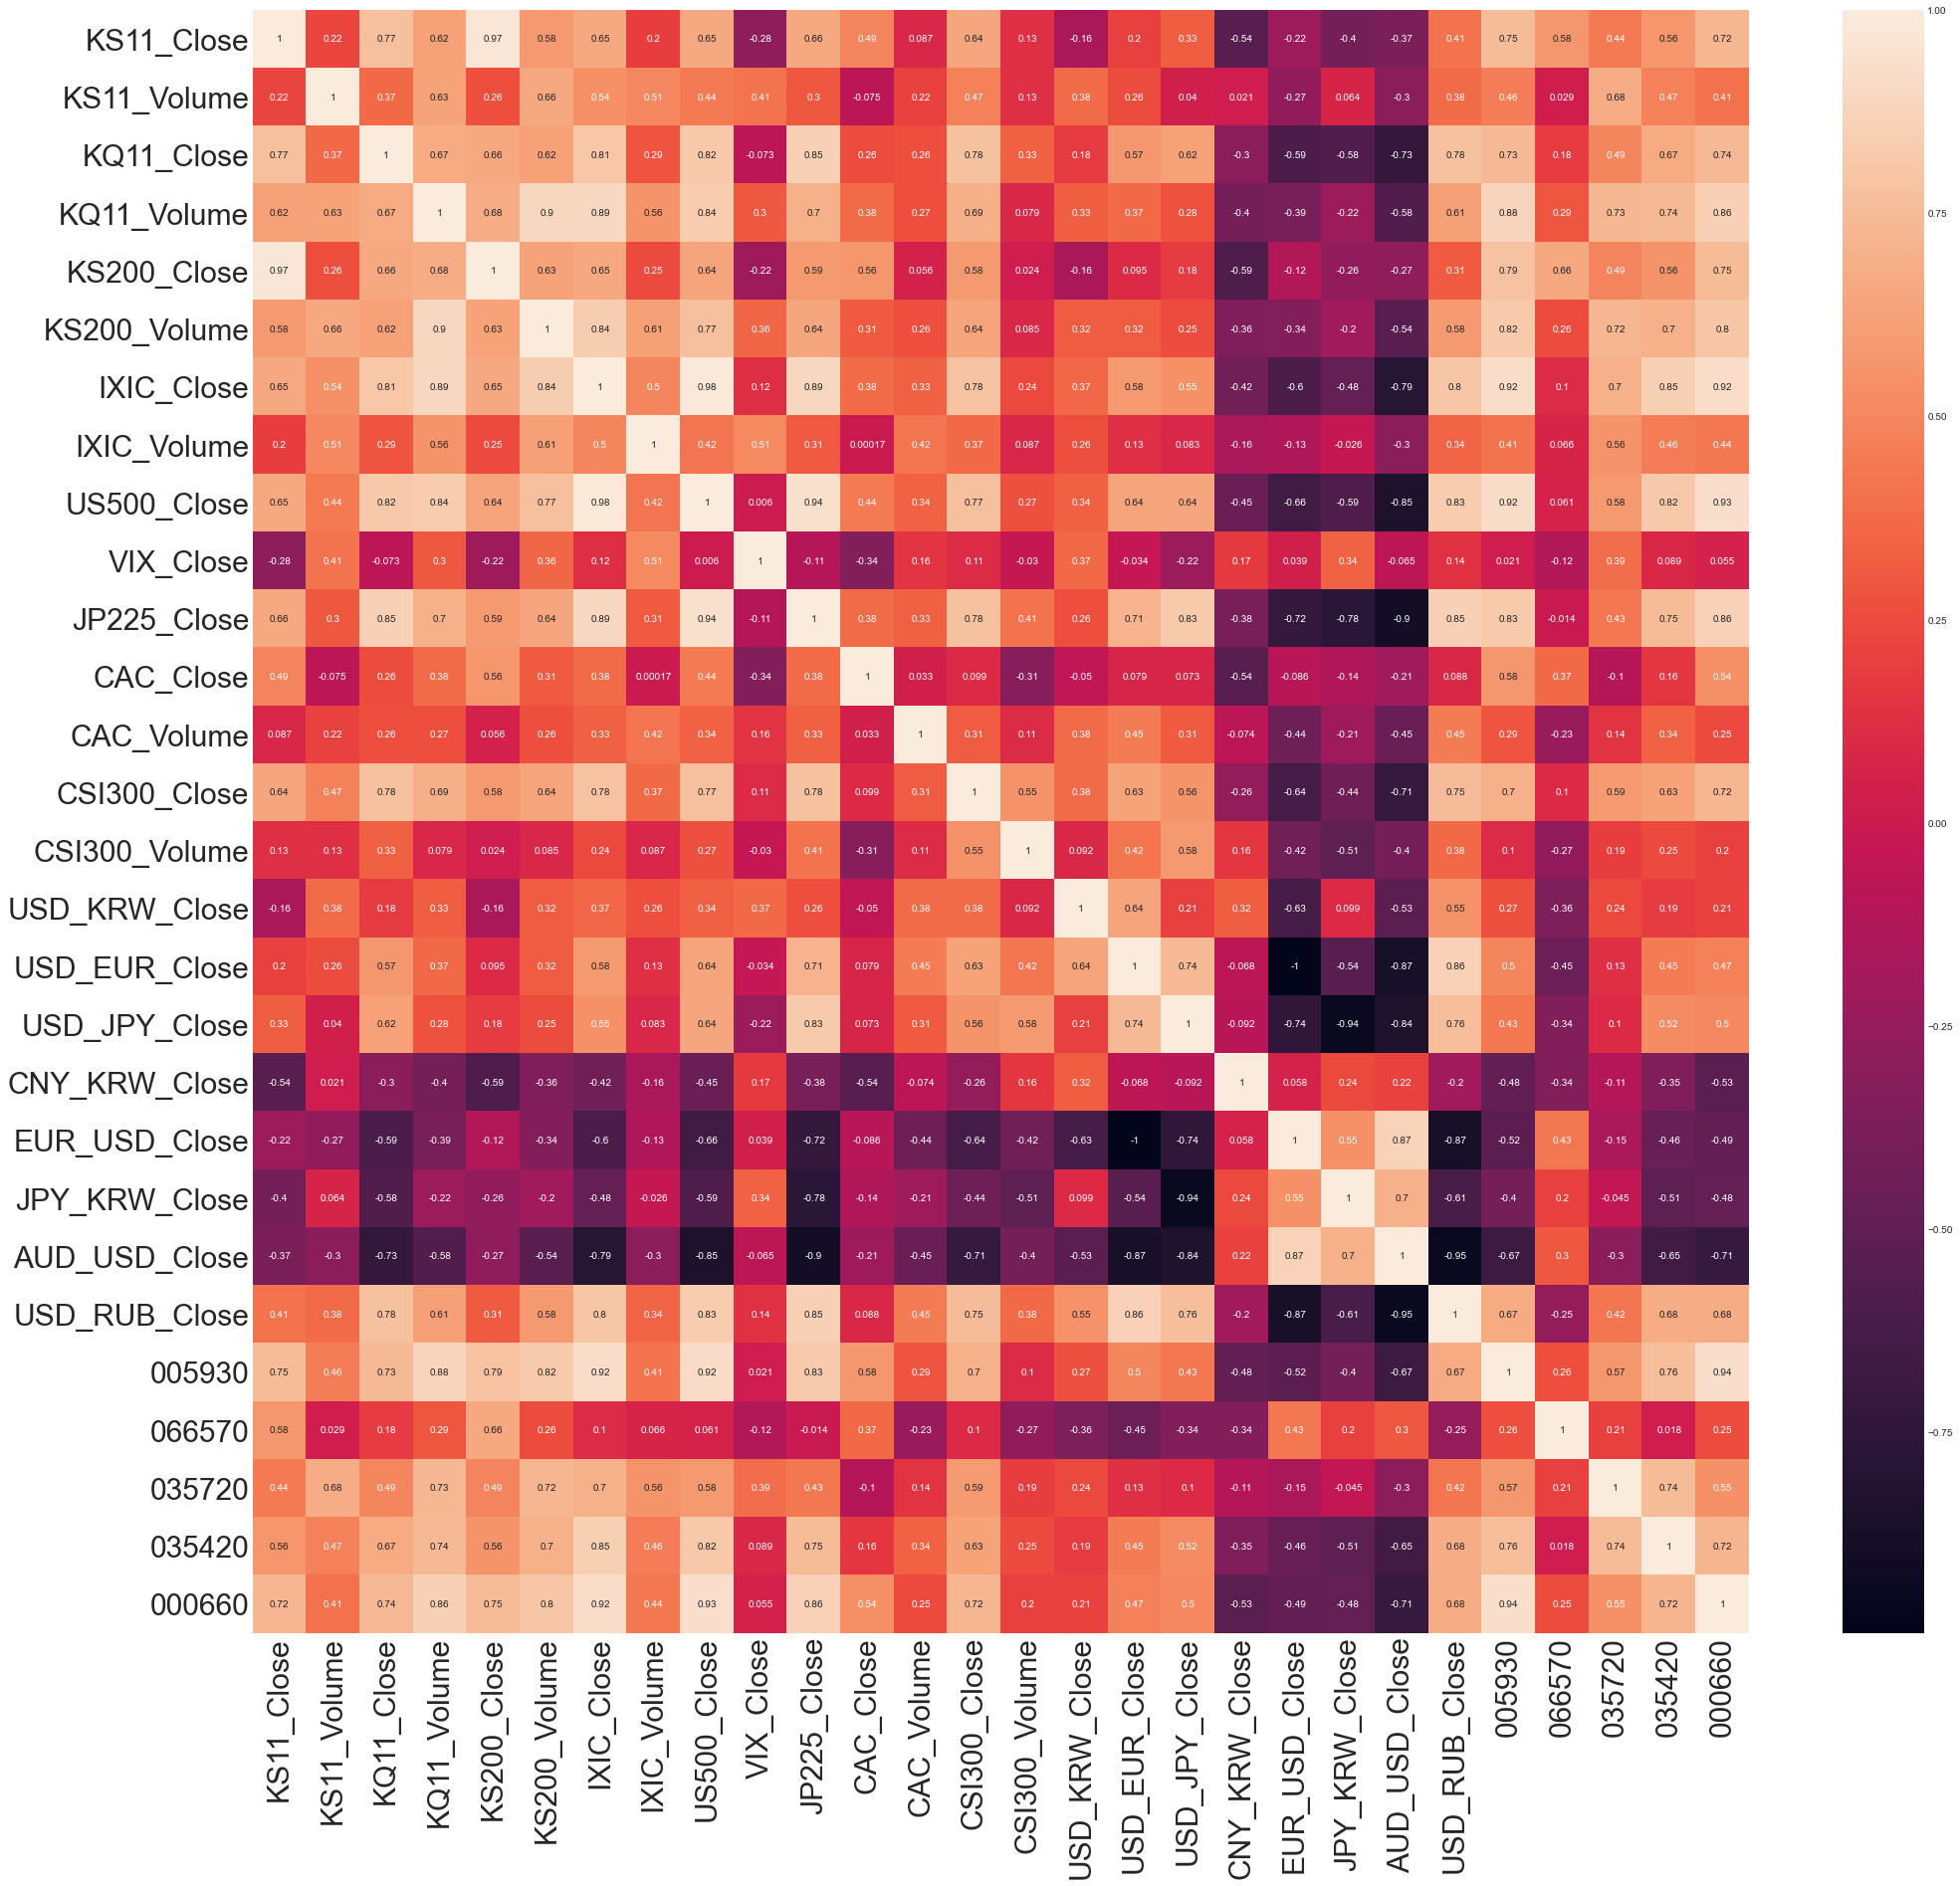

In [22]:
#3.5 상관관계 보기
def corrHeatMap(df, method='pearson') :    
    fig, ax = plt.subplots(figsize=(30,30))
    smap = sns.heatmap(df.corr(method=method), annot=True, ax=ax)
    smap.set_xticklabels(smap.get_xmajorticklabels(), fontsize=30)
    smap.set_yticklabels(smap.get_ymajorticklabels(), fontsize=30)
    return
corrHeatMap(df)

In [23]:
#4 Y 값 넣기
for i in stockList :
    df[i+'_change'] = df[i].pct_change()
    #df[i+'_change'] = df[i+'_change'].shift(-1)
df

,KS11_Close,KS11_Volume,KQ11_Close,KQ11_Volume,KS200_Close,KS200_Volume,IXIC_Close,IXIC_Volume,US500_Close,VIX_Close,...,005930,066570,035720,035420,000660,005930_change,066570_change,035720_change,035420_change,000660_change
2011-01-04,2085.14,4.159100e+08,521.35,7.269300e+05,275.78,113810.0,2681.25,4.726800e+08,1270.20,17.38,...,19160.0,115318.0,77600.0,69530.0,25600.0,NaN,NaN,NaN,NaN,NaN
2011-01-05,2082.55,3.860600e+08,523.81,6.404300e+05,275.35,127210.0,2702.20,4.668700e+08,1276.56,17.02,...,18840.0,113364.0,78000.0,69843.0,25900.0,-0.016701,-0.016944,0.005155,0.004502,0.011719
2011-01-06,2077.61,4.078300e+08,527.64,7.939000e+05,274.72,143230.0,2709.89,4.738500e+08,1273.85,17.40,...,18600.0,112386.0,78200.0,69530.0,26100.0,-0.012739,-0.008627,0.002564,-0.004481,0.007722
2011-01-07,2086.20,3.355600e+08,530.84,6.574500e+05,275.61,113110.0,2703.17,4.623800e+08,1271.50,17.14,...,18420.0,110920.0,80100.0,70628.0,26100.0,-0.009677,-0.013044,0.024297,0.015792,0.000000
2011-01-10,2080.81,3.426400e+08,533.98,6.167800e+05,273.99,123710.0,2707.80,4.413000e+08,1269.75,17.54,...,18340.0,112386.0,79300.0,67489.0,25300.0,-0.004343,0.013217,-0.009988,-0.044444,-0.030651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,2808.60,1.010000e+09,927.00,1.640000e+09,379.93,304330000.0,12899.42,9.783400e+08,3735.36,21.70,...,78700.0,124500.0,373000.0,281000.0,115500.0,0.011568,0.111607,-0.002674,-0.003546,-0.021186
2020-12-29,2820.51,1.050000e+09,957.41,1.510000e+09,381.27,234720000.0,12850.22,8.968100e+08,3727.04,23.08,...,78300.0,131500.0,384500.0,283000.0,116000.0,-0.005083,0.056225,0.030831,0.007117,0.004329
2020-12-30,2873.47,1.070000e+09,968.42,1.640000e+09,389.29,236860000.0,12870.00,9.540100e+08,3732.04,22.77,...,81000.0,135000.0,389500.0,292500.0,118500.0,0.034483,0.026616,0.013004,0.033569,0.021552
2021-01-04,2944.45,1.030000e+09,977.62,1.700000e+09,399.88,361890000.0,12698.45,1.270000e+09,3700.65,26.97,...,83000.0,142000.0,396000.0,293000.0,126000.0,0.024691,0.051852,0.016688,0.001709,0.063291


In [24]:
#4 데이터 정규화하기 
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns, index=df.index)

#4 Y 값 넣기
for i in stockList :
    df_scaled.drop([i+'_change'], axis=1, inplace=True)
    df_scaled[i+'_change'] = df[i+'_change']
df_scaled = df_scaled[1:]
df_scaled

,KS11_Close,KS11_Volume,KQ11_Close,KQ11_Volume,KS200_Close,KS200_Volume,IXIC_Close,IXIC_Volume,US500_Close,VIX_Close,...,005930,066570,035720,035420,000660,005930_change,066570_change,035720_change,035420_change,000660_change
2011-01-05,0.003508,-0.246139,-0.938225,-0.676016,0.201882,-0.619340,-1.197104,-0.278852,-1.402549,-0.068592,...,-1.239168,2.620372,-0.797853,-1.236134,-1.024809,-0.016701,-0.016944,0.005155,0.004502,0.011719
2011-01-06,-0.021967,-0.143171,-0.905208,-0.675745,0.179064,-0.619109,-1.193849,-0.246321,-1.406803,-0.017789,...,-1.257635,2.558792,-0.794638,-1.241997,-1.016501,-0.012739,-0.008627,0.002564,-0.004481,0.007722
2011-01-07,0.022330,-0.484996,-0.877622,-0.675986,0.211299,-0.619544,-1.196694,-0.299778,-1.410491,-0.052549,...,-1.271485,2.466486,-0.764095,-1.221427,-1.016501,-0.009677,-0.013044,0.024297,0.015792,0.000000
2011-01-10,-0.005465,-0.451509,-0.850553,-0.676058,0.152624,-0.619391,-1.194734,-0.398023,-1.413238,0.000928,...,-1.277641,2.558792,-0.776955,-1.280235,-1.049730,-0.004343,0.013217,-0.009988,-0.044444,-0.030651
2011-01-11,0.033262,-0.128414,-0.853225,-0.675840,0.192827,-0.619522,-1.190912,-0.487459,-1.405814,-0.085973,...,-1.283796,2.528065,-0.749627,-1.300805,-1.045576,-0.004362,-0.004342,0.021438,-0.016269,0.003953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,3.747568,2.704998,2.537538,2.217870,3.989682,3.769940,3.118863,2.104893,2.456700,0.557095,...,3.366800,3.321546,3.944382,2.719791,2.696794,0.011568,0.111607,-0.002674,-0.003546,-0.021186
2020-12-29,3.808985,2.894191,2.799693,1.988387,4.038216,2.765552,3.098039,1.724916,2.443641,0.741593,...,3.336022,3.762298,4.129249,2.757260,2.717562,-0.005083,0.056225,0.030831,0.007117,0.004329
2020-12-30,4.082086,2.988788,2.894606,2.217870,4.328693,2.796429,3.106411,1.991501,2.451489,0.700148,...,3.543775,3.982674,4.209625,2.935238,2.821401,0.034483,0.026616,0.013004,0.033569,0.021552
2021-01-04,4.448112,2.799594,2.973916,2.323786,4.712254,4.600462,3.033803,3.464197,2.402220,1.261662,...,3.697666,4.423427,4.314115,2.944605,3.132919,0.024691,0.051852,0.016688,0.001709,0.063291


In [25]:
#4 test, train 나누기
train_set = df_scaled[:'2018-01-01'].values
#test_set = df_scaled['2018-01-01':].values

print(df_scaled.shape)
print(train_set.shape)
#print(test_set.shape)

(2463, 33)
(1723, 33)


In [26]:
y_columns = []
x_columns = df_scaled.columns.tolist()
for i in stockList :
    y_columns.append(i+'_change')
    x_columns.remove(i+'_change')

In [27]:
# 60일치 데이터로 예측
time_seq = 60
X_train = []
y_train = []
for i in range(time_seq, train_set.shape[0]):
    X_train.append(train_set[i-60:i, 0:train_set.shape[1]-len(stockList)])
    y_train.append(train_set[i, train_set.shape[1]-len(stockList):])
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
print(X_train.shape)
print(y_train.shape)

(1663, 60, 28)
(1663, 5)


In [29]:
#6 머신러닝에 적용하기

In [39]:
#7 딥러닝에 적용하기

# LSTM 모델 만들기
model = Sequential()
# LSTM 레이어를 쌓아올릴 때는 return_sequences 를 True로 설정한다
# LSTM 을 사용하기 위해서는 3차원 데이터가 필요(batch_size, timesteps, input_dim)
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(5))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
17/17 [==============================] - 2s 110ms/step - loss: 0.0023
Epoch 2/5
17/17 [==============================] - 2s 109ms/step - loss: 7.1806e-04
Epoch 3/5
17/17 [==============================] - 2s 99ms/step - loss: 5.6526e-04
Epoch 4/5
17/17 [==============================] - 2s 95ms/step - loss: 5.2812e-04
Epoch 5/5
17/17 [==============================] - 2s 95ms/step - loss: 5.1546e-04


In [40]:
# 60일치 데이터로 예측
X_test = []
y_test = []
for i in range(train_set.shape[0], df_scaled.shape[0]):
    X_test.append(df_scaled.values[i-60:i, 0:train_set.shape[1]-len(stockList)])
    y_test.append(df_scaled.values[i, train_set.shape[1]-len(stockList):])
X_test, y_test = np.array(X_test), np.array(y_test)

predictions = model.predict(X_test)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.051102751526231616

In [41]:
# train set의 평균을 예측값으로 했을 때의 오차
mu = y_train.mean()
np.sqrt(np.mean((y_test - mu) ** 2)) 

0.02239693800960227

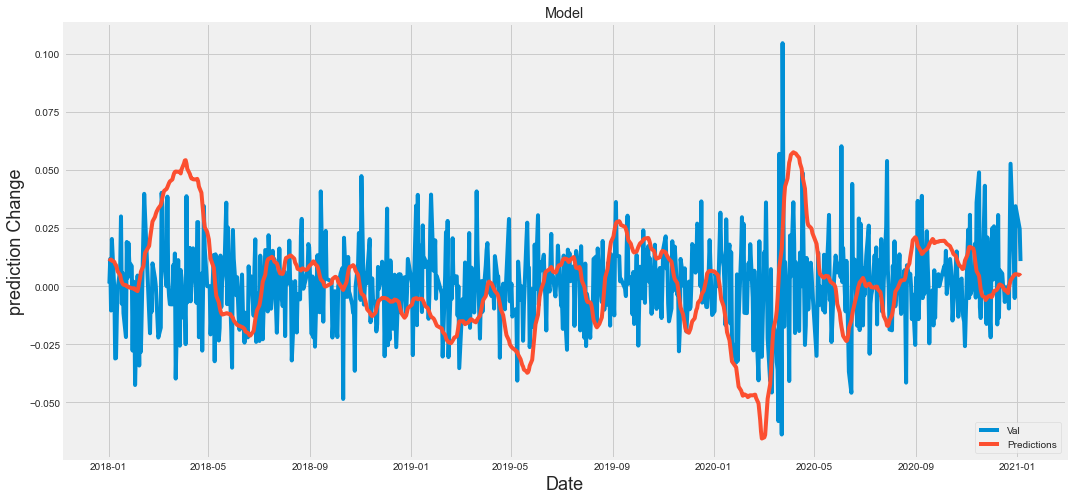

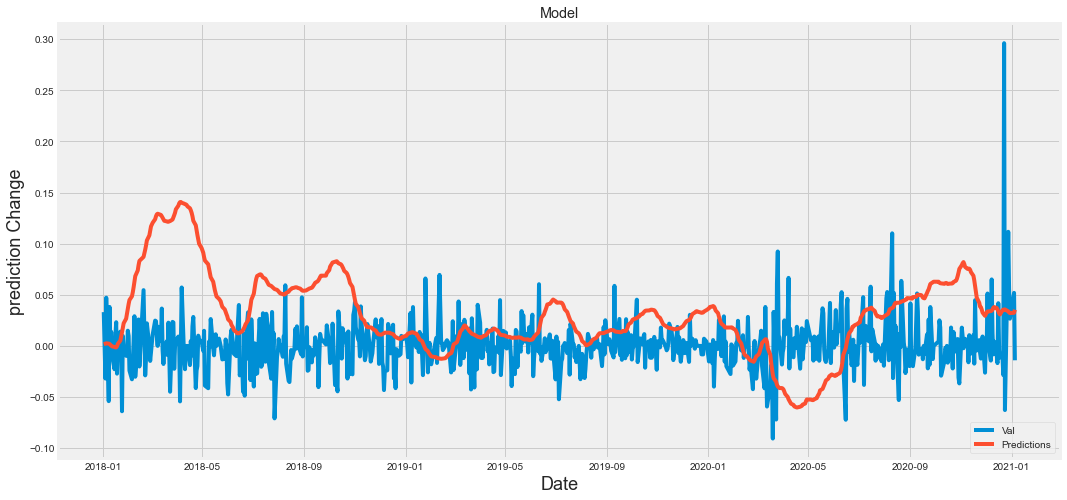

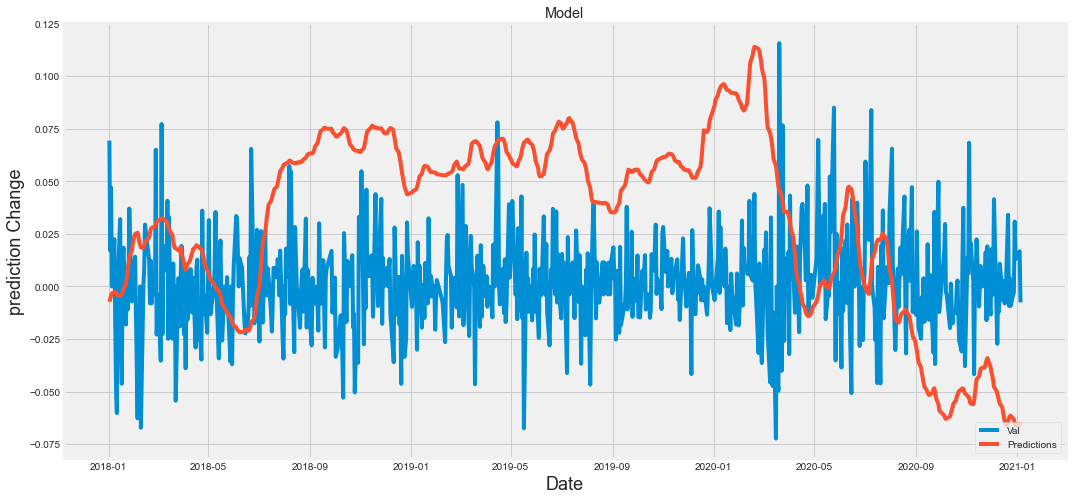

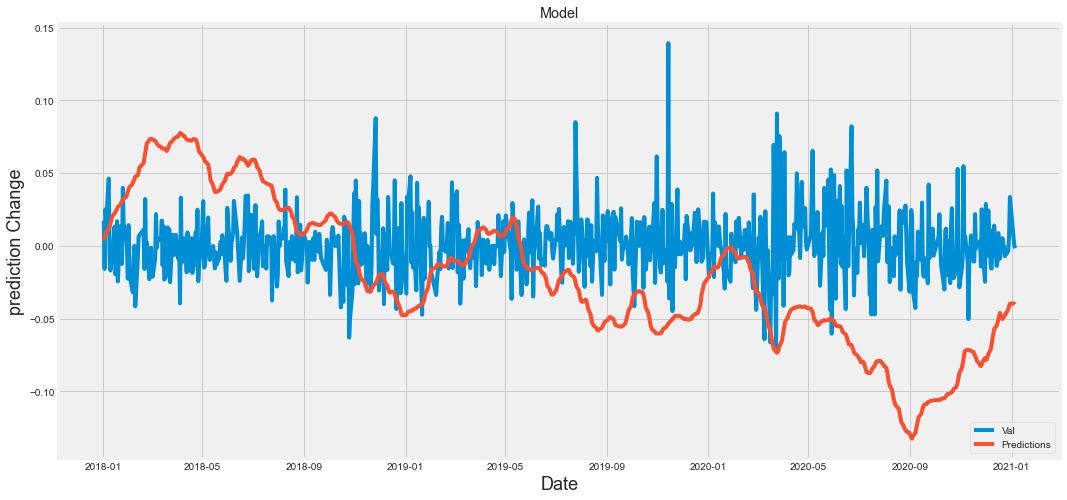

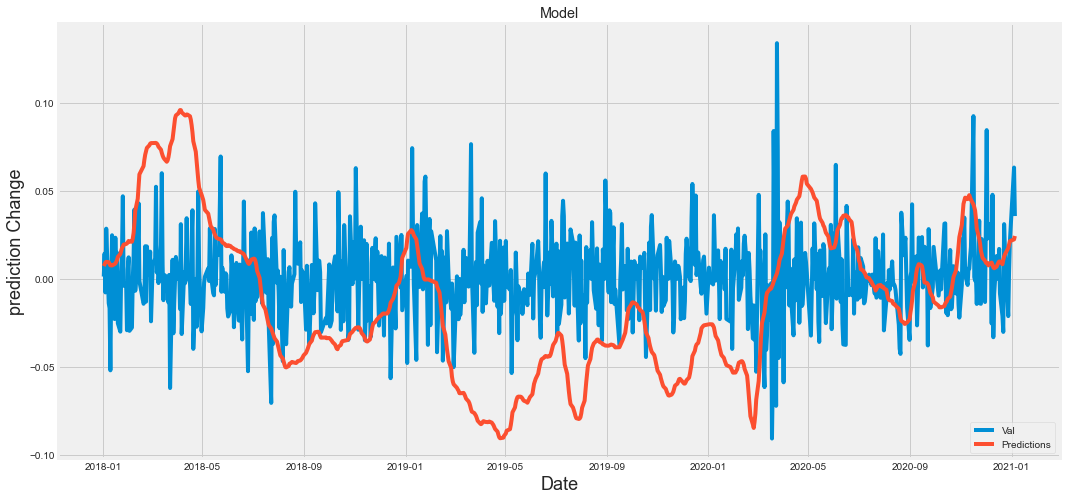

In [42]:
# 그래프로 확인
for i in range(0, len(stockList)) :
    train = df_scaled[:'2018-01-01']
    valid = df_scaled['2018-01-01':]
    valid['Predictions'] = predictions[:,i]

    plt.figure(figsize=(16, 8))
    plt.title('Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('prediction Change', fontsize=18)
    #plt.plot(train[stockList[i] +'_change'])
    plt.plot(valid[[stockList[i] +'_change', 'Predictions']])
    plt.legend(['Val', 'Predictions'], loc='lower right')
    plt.show()